In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from models import random_graph, watts_strogatz, barabasi_albert, show_statistics, pdf_emp, cdf_emp, dist_cdf_plot, dist_pdf_plot, show_degree_distribution
import pandas as pd
import scipy.stats

#### 1. Implement the following models in the language of your preference:
* Random graph.
* Watts-Strogatz model.
* Barabasi-Albert model.

implemented and placed in __models/graph.py__ file

#### Set the number of nodes to N = 2000, simulate the models for various settings of the parameters and save the graphs. You may use graph data structures provided by the existing network libraries or your own class to store the graphs. For each graph:
* Report the number of vertices and edges.
* Compute the average degree and the variance of the degree distribution.

models/utils.py - function __show_statistics(graph: nx.Graph) -> dict__.


In [2]:
N = 2000
p = [1/4, 1/2, 3/4]

* Generate the frequency plot for the degrees of the nodes.
* Fit a model distribution to the obtained data. In case of the Barabasi-Albert graph, you may have a look at http://tuvalu.santafe.edu/~aaronc/powerlaws/

All the functions for plotting and fitting distributions are placed in __models/plots.py__.

N=2000, p=0.25
statistics: {'vertices': 2000, 'edges': 500054, 'mean_degree': 500.054, 'var_degree': 373.91108399999996}


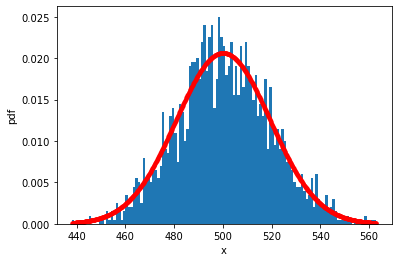

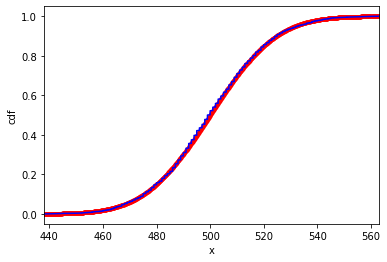

N=2000, p=0.5
statistics: {'vertices': 2000, 'edges': 999386, 'mean_degree': 999.386, 'var_degree': 517.926004}


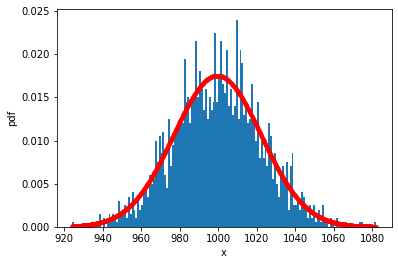

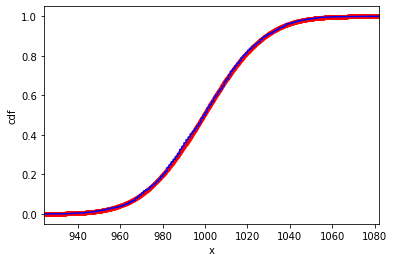

N=2000, p=0.75
statistics: {'vertices': 2000, 'edges': 1499563, 'mean_degree': 1499.563, 'var_degree': 364.3630310000001}


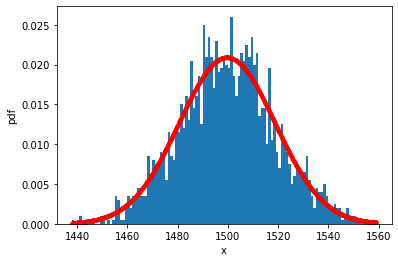

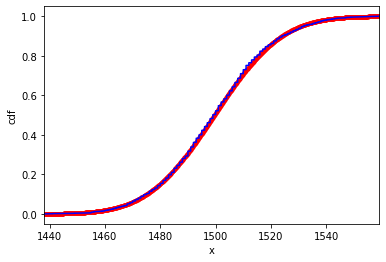

In [3]:
# random graph

for p_i in p:
    network = random_graph(N, p_i)
    print(f'N={N}, p={p_i}')

    show_degree_distribution(network = network, distribution = scipy.stats.norm)

N=2000, k=100, beta=0.1
statistics: {'vertices': 2000, 'edges': 100000, 'mean_degree': 100.0, 'var_degree': 9.654}


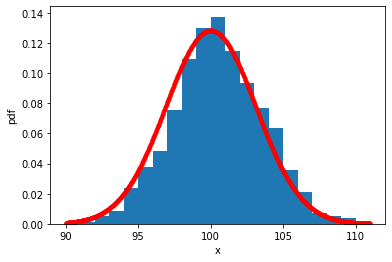

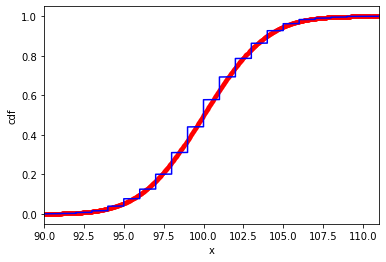

N=2000, k=100, beta=0.5
statistics: {'vertices': 2000, 'edges': 100000, 'mean_degree': 100.0, 'var_degree': 48.48}


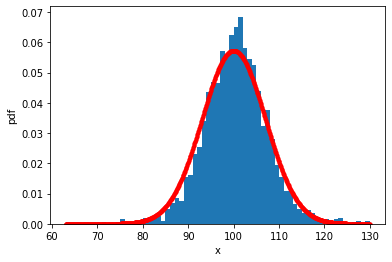

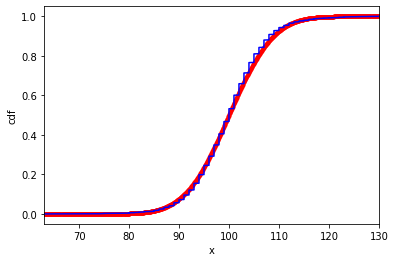

N=2000, k=100, beta=0.9
statistics: {'vertices': 2000, 'edges': 100000, 'mean_degree': 100.0, 'var_degree': 86.745}


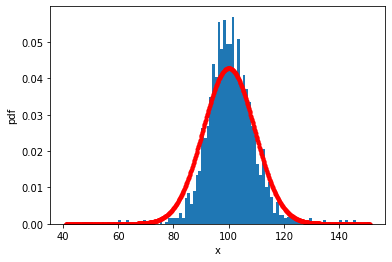

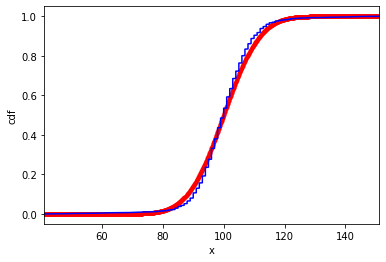

N=2000, k=500, beta=0.1
statistics: {'vertices': 2000, 'edges': 500000, 'mean_degree': 500.0, 'var_degree': 102.128}


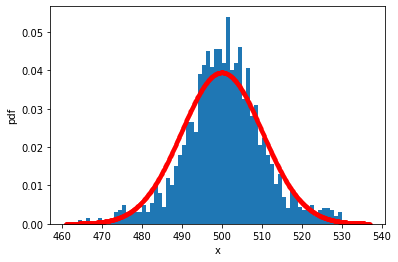

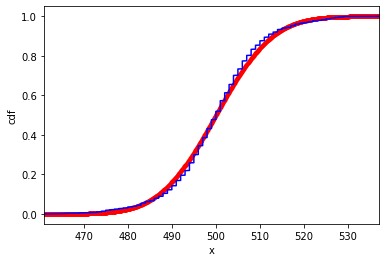

N=2000, k=500, beta=0.5
statistics: {'vertices': 2000, 'edges': 500000, 'mean_degree': 500.0, 'var_degree': 1437.959}


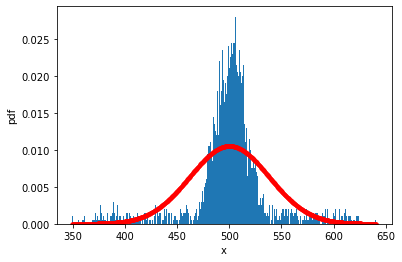

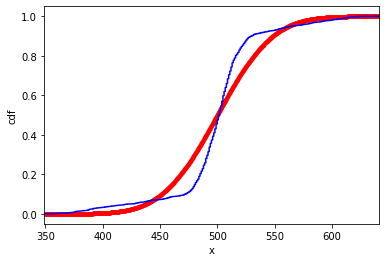

N=2000, k=500, beta=0.9
statistics: {'vertices': 2000, 'edges': 500000, 'mean_degree': 500.0, 'var_degree': 4369.109}


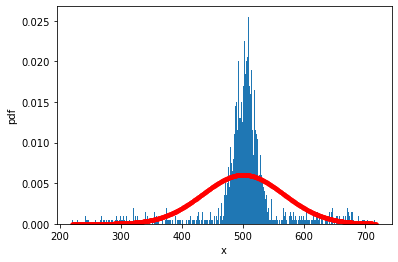

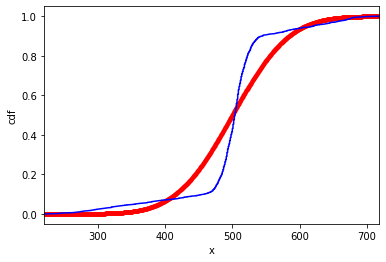

In [4]:
# TODO: change distribution here

# watts-strogatz graph
k = [100,500]
beta = [0.1, 0.5, 0.9]

for k_i in k:
    for beta_j in beta:
        network = watts_strogatz(N, k_i, beta_j)
        print(f'N={N}, k={k_i}, beta={beta_j}')

        show_degree_distribution(network = network, distribution = scipy.stats.norm)




N=2000, m=2
statistics: {'vertices': 2000, 'edges': 3996, 'mean_degree': 3.996, 'var_degree': 27.089983999999998}


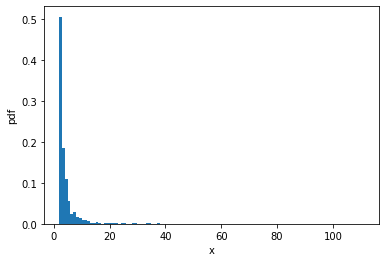

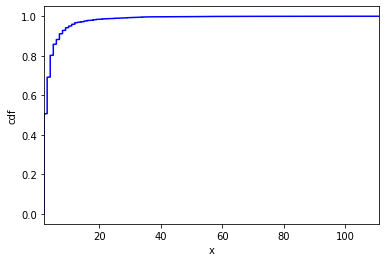

N=2000, m=20
statistics: {'vertices': 2000, 'edges': 39600, 'mean_degree': 39.6, 'var_degree': 1130.081}


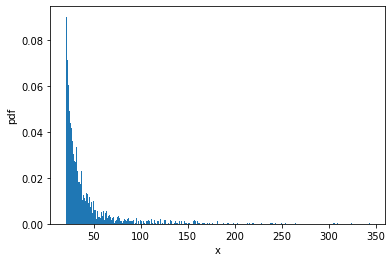

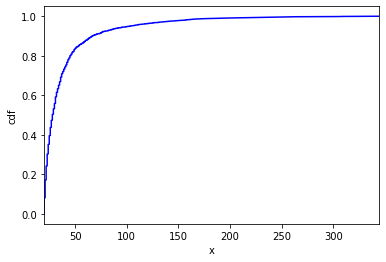

N=2000, m=40
statistics: {'vertices': 2000, 'edges': 78400, 'mean_degree': 78.4, 'var_degree': 3368.4850000000006}


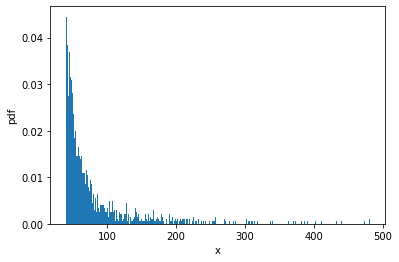

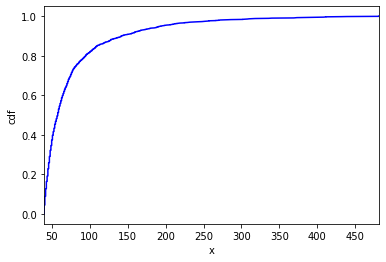

In [6]:
# Barabasi-Albert
# TODO: change that
m = [2,20,40]

for m_i in m:
    network = barabasi_albert(N, m_i)
    print(f'N={N}, m={m_i}')

    show_degree_distribution(network = network)


#### 2. LiveJournal (www.livejournal.com) is a blogging site very popular in Russia and Eastern Europe1. It has a simple API and a generous policy for data mining (see http://www.livejournal.com/bots/).
* Write a function that fetches a list of friends of a test user valerois and transforms it into a graph.

* Once you have the list of friends, you may use the snowball sampling method (also known as chain sampling or respondent-driven sampling) to map the social network. Limit the depth of the search to two or three levels to avoid an
explosion of data.

* Save the results into a file. From know on work with the local copy of the network instead of sampling it every time.


The injection is placed in __models/live_journal.py__.

File is saved in csv file: __data/valerois_network_depth_2.csv__.

I work with depth = 2, it means, there are saved connections:
* valerois -- friends of valerois
* friends of valerois -- friends of friends of valerois.

In [2]:
network_df = pd.read_csv('data/valerois_network_depth_2.csv')
network_df.sample(5)

,from_node,to_node
170187,milaanufrieva,julia_basova
238867,moscowpoker,yaroslavnna
24178,moya_kazna,impr0mptu
181585,la_serafina,miss4gu
87470,partizanman,krym_sp


In [3]:
network_df.describe()

,from_node,to_node
count,310307,310307
unique,300,130919
top,alexpashkov,valerois
freq,4734,292


In [3]:
network = nx.from_pandas_edgelist(network_df,'from_node','to_node')

* Determine the number of nodes and edges in the network.

In [5]:
print(f'valerois connections: {len(network["valerois"])}')
print(f'statistics:\n{show_statistics(network)}')


valerois connections: 299
statistics:
{'vertices': 130919, 'edges': 308489, 'mean_degree': 4.712669665976673, 'var_degree': 5869.1879291380565}


* Find celebrities in the network (hint: degree centrality).

In [42]:
degree_centrality = nx.degree_centrality(network)

dict(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))

{'alexpashkov': 0.03628225301333659,
 'borisakunin': 0.034853877999969446,
 'trirub': 0.034387937487587644,
 'no_globalism': 0.03334148092699247,
 'lara_x': 0.033196351914939116,
 'gogol': 0.0327838799859454,
 'morena_morana': 0.03247834522372783,
 'matveychev_oleg': 0.03197421286606884,
 'goodspider': 0.0319283826517362,
 'timgud': 0.031340228234467374,
 'das_foland': 0.03030904841198307,
 'ministrkultury': 0.03030141004292763,
 'alexmonc': 0.030247941459539556,
 'camoe': 0.03010281244748621,
 'sass_hummel': 0.02998059854259918,
 'altruisttka': 0.029766724209046882,
 'leo_taxil': 0.02956812661360546,
 'sergey_gora': 0.029529934768328263,
 'evroru': 0.029323698803831403,
 'artem_klyushin': 0.029117462839334543,
 'magesqueen': 0.028704990910340823,
 'sosedgeorg': 0.02831543408851342,
 'qualityperson': 0.028246688767014465,
 'xcontcom': 0.02659680105103958,
 'natura_andrey': 0.025817687407384774,
 'karial': 0.025710750240608624,
 'morseanen': 0.025710750240608624,
 'stalic': 0.0248934447

* Plot the degree distribution of the network.

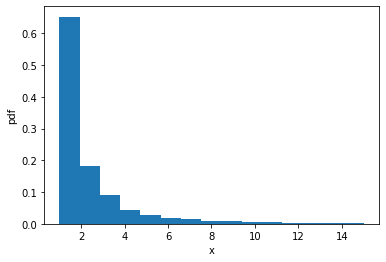

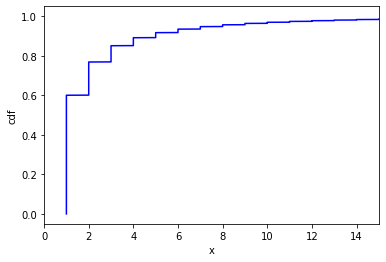

In [5]:
degree_list = [val for key, val in network.degree()]
ex = np.mean(degree_list)


plt.figure(0)
pdf_emp(degree_list,bins=15,range=[1,15])
plt.xlabel('x')
plt.ylabel('pdf')
# dist_pdf_plot(domain=(1,15), distribution=scipy.stats.expon, scale=2)
plt.figure(1)
plt.xlim(0,15)
plt.xlabel('x')
plt.ylabel('cdf')
cdf_emp(degree_list,show=True)

as we can see it's some kind of discrete exponential / gamma-like distribution

* Find communication bottlenecks (hint: betweenness centrality).

Due to huge computing power needed for this task (130k nodes), I use approximation working on a random k=100 elements subset

In [49]:
%%time
betweenness_centrality = nx.betweenness_centrality(network, k=100)

CPU times: total: 1min 7s
Wall time: 1min 7s


In [50]:
dict(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True))

{'valerois': 0.07740587557140113,
 'alexpashkov': 0.05529342975819639,
 'ministrkultury': 0.05115650722024955,
 'borisakunin': 0.03995915581913746,
 'timgud': 0.0368742920768233,
 'le_milady': 0.03670501362661509,
 'pavelrudnev': 0.03602592170499199,
 'irenabar': 0.03084142060006977,
 'azbukivedi': 0.030789825115952907,
 'ksenia_vasil': 0.030415536544234824,
 'olganovikova': 0.029843053799190347,
 'karial': 0.02836553545480353,
 'evroru': 0.02759033061185173,
 'matveychev_oleg': 0.026771214146114566,
 'trirub': 0.026499431914111762,
 'tareeva': 0.026424511399713576,
 'pavel_kosenko': 0.026389274345191786,
 'artem_klyushin': 0.026362220807901886,
 'red_garnet': 0.0257708487064628,
 'nicety': 0.02524959168871788,
 'grazdano4ka': 0.025160953929944673,
 'stalic': 0.02509790286405425,
 'morena_morana': 0.024822388996697402,
 'glam_blog': 0.024791250451467566,
 'gogol': 0.024522507505910694,
 'kirulya': 0.02423345377260807,
 'lara_x': 0.02384022338475089,
 'sol_tat': 0.023243481381799123,
 '